# 👜 Bagging Ensemble (Bootstrap Aggregating)

---

## 🎯 **What is it?**
Bootstrap Aggregating (Bagging) is an ensemble method that trains multiple models on different bootstrap samples of the training data, then combines their predictions through averaging (regression) or voting (classification).

**Core Principle**: Reduce variance by training on diverse subsets of data.

---

## 🔄 **Bootstrap Sampling Process**

### 📊 **Bootstrap Sample Generation**
> Create multiple datasets by sampling with replacement

Given training set $\mathcal{D} = \{(x_1, y_1), (x_2, y_2), ..., (x_n, y_n)\}$

**Bootstrap Sample $\mathcal{B}_i$:**
- Sample $n$ examples with replacement from $\mathcal{D}$
- Each sample has probability $\frac{1}{n}$ of being selected
- Some examples appear multiple times, others not at all

**Out-of-Bag (OOB) Probability:**
$$P(\text{example not selected}) = \left(1 - \frac{1}{n}\right)^n \approx \frac{1}{e} \approx 0.368$$

About 36.8% of original data is **out-of-bag** for each bootstrap sample.

---

## ⚙️ **Bagging Algorithm**

| Step | Process | Mathematical Representation |
|------|---------|----------------------------|
| 1️⃣ | **Generate Bootstrap Samples** | $\mathcal{B}_1, \mathcal{B}_2, ..., \mathcal{B}_B$ |
| 2️⃣ | **Train Base Models** | $M_i = \text{Train}(\mathcal{B}_i)$ for $i = 1, ..., B$ |
| 3️⃣ | **Combine Predictions** | $\hat{y} = \frac{1}{B}\sum_{i=1}^{B} M_i(x)$ (regression) |
| 4️⃣ | **Final Output** | $\hat{y} = \text{majority\_vote}(M_1(x), ..., M_B(x))$ (classification) |

---

## 📊 **Mathematical Foundation**

### 🎯 **Variance Reduction**
For $B$ independent models with variance $\sigma^2$:

**Individual Model Variance:** $\text{Var}(M_i) = \sigma^2$

**Bagged Ensemble Variance:**
$$\text{Var}\left(\frac{1}{B}\sum_{i=1}^{B} M_i\right) = \frac{\sigma^2}{B}$$

**Variance Reduction Factor:** $\frac{1}{B}$

### 🔗 **With Model Correlation**
If models have correlation $\rho$:

$$\text{Var}_{\text{bagged}} = \rho\sigma^2 + \frac{1-\rho}{B}\sigma^2$$

**Key Insight**: Lower correlation $\rho$ → better variance reduction

---

## 🏗️ **Popular Bagging Methods**

### 🌲 **Random Forest**
> Bagging + Random Feature Selection

**Enhancements over basic bagging:**
- Random subset of features at each split: $m = \sqrt{p}$ (classification), $m = \frac{p}{3}$ (regression)
- Decorrelates trees further
- Additional variance reduction

**Feature Selection Probability:**
$$P(\text{feature selected}) = \frac{m}{p}$$

### 🎯 **Extra Trees (Extremely Randomized Trees)**
> Random Forest + Random Splits

**Additional Randomization:**
- Random thresholds for splits (not optimal)
- Further decorrelation
- Faster training

### 📊 **Bagged Decision Trees**
> Basic bagging with decision trees

**Standard Implementation:**
- Bootstrap samples of same size as original
- Full decision trees (no pruning)
- Average predictions

---

## 🔍 **Out-of-Bag (OOB) Evaluation**

### 🎯 **OOB Error Estimation**
> Use out-of-bag samples for validation

For each example $x_i$:
1. Find all models where $x_i$ was OOB
2. Average their predictions: $\hat{y}_i^{\text{OOB}}$
3. Compute OOB error: $\text{OOB Error} = \frac{1}{n}\sum_{i=1}^{n} L(y_i, \hat{y}_i^{\text{OOB}})$

**OOB vs Validation Set:**
$$\text{OOB Error} \approx \text{Test Error}$$

**Advantages:**
- No need for separate validation set
- Uses all data for training
- Unbiased error estimate

---

## ✅ **Advantages**

```
✓ Reduces overfitting (variance reduction)
✓ Works well with high-variance models
✓ Parallel training possible
✓ Out-of-bag error estimation
✓ Simple to implement and understand
✓ Robust to noise and outliers
✓ No hyperparameter tuning needed for basic version
```

## ❌ **Disadvantages**

```
✗ May underfit if base models have high bias
✗ Less effective with stable, low-variance models
✗ Computational overhead (multiple models)
✗ Memory requirements increase
✗ Less interpretable than single models
✗ May not improve performance significantly for linear models
```

---

## 🛠️ **Hyperparameters**

### 🎯 **Key Parameters**

| Parameter | Effect | Typical Values | Tuning Strategy |
|-----------|--------|----------------|-----------------|
| **n_estimators** | Number of base models | 100-1000 | More is better (diminishing returns) |
| **max_samples** | Bootstrap sample size | 1.0 (default) | 0.5-1.0 for large datasets |
| **max_features** | Features per model | All (default) | Subset for correlation reduction |
| **bootstrap** | Use bootstrap sampling | True | False for pasting |
| **oob_score** | Calculate OOB error | False | True for validation |

### 📊 **Base Model Parameters**
Control complexity of individual models:
- **max_depth**: Tree depth
- **min_samples_split**: Minimum samples to split
- **min_samples_leaf**: Minimum samples in leaf

---

## 💻 **Implementation Examples**

### 🌲 **Bagging Classifier/Regressor**
```python
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier

# Bagging with decision trees
bagging_clf = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,        # 80% of data per bag
    max_features=0.8,       # 80% of features per bag
    bootstrap=True,         # Bootstrap sampling
    oob_score=True,         # Calculate OOB error
    random_state=42,
    n_jobs=-1              # Parallel processing
)

# Fit and evaluate
bagging_clf.fit(X_train, y_train)
print(f"OOB Score: {bagging_clf.oob_score_:.4f}")
```

### 🌳 **Random Forest (Advanced Bagging)**
```python
from sklearn.ensemble import RandomForestClassifier

# Random Forest (bagging + feature randomness)
rf_clf = RandomForestClassifier(
    n_estimators=100,
    max_features='sqrt',    # √p features per split
    max_depth=10,
    min_samples_split=5,
    bootstrap=True,
    oob_score=True,
    random_state=42,
    n_jobs=-1
)
```

---

## 📈 **Performance Analysis**

### 🎯 **Learning Curves**
```python
def plot_bagging_learning_curve(n_estimators_range):
    train_scores = []
    oob_scores = []
    
    for n_est in n_estimators_range:
        bagging = BaggingClassifier(n_estimators=n_est, oob_score=True)
        bagging.fit(X_train, y_train)
        
        train_score = bagging.score(X_train, y_train)
        oob_score = bagging.oob_score_
        
        train_scores.append(train_score)
        oob_scores.append(oob_score)
    
    return train_scores, oob_scores
```

### 📊 **Bias-Variance Tradeoff**

**Effect of Number of Estimators:**
- **Low B**: High variance, low bias
- **High B**: Low variance, bias unchanged
- **Optimal B**: Plateau in performance

$$\text{Expected Error} = \text{Bias}^2 + \text{Variance} + \text{Noise}$$

---

## 🎪 **Use Cases**

### 🏥 **Medical Diagnosis**
```python
# Ensemble of different diagnostic approaches
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

bagging_medical = BaggingClassifier(
    base_estimator=SVC(probability=True),
    n_estimators=50,
    max_features=0.8  # Not all symptoms needed
)
```

### 📈 **Financial Risk Assessment**
```python
# Bagged regression for risk scoring
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

bagging_risk = BaggingRegressor(
    base_estimator=DecisionTreeRegressor(max_depth=8),
    n_estimators=200,
    max_samples=0.7,
    oob_score=True
)
```

### 🖼️ **Image Classification**
```python
# Bagging with different image features
bagging_image = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_features=0.6,  # Random feature subsets
    bootstrap_features=True
)
```

---

## 🔬 **Advanced Techniques**

### 🎲 **Pasting**
> Sampling without replacement
```python
# Pasting instead of bagging
pasting = BaggingClassifier(
    bootstrap=False,  # No replacement
    max_samples=0.6   # 60% of data per model
)
```

### 🎯 **Random Patches**
> Random sampling of both samples and features
```python
# Random patches method
random_patches = BaggingClassifier(
    bootstrap=True,           # Bootstrap samples
    bootstrap_features=True,  # Bootstrap features
    max_samples=0.8,
    max_features=0.6
)
```

### 🌟 **Feature Importance**
```python
# Aggregate feature importance from bagged models
def get_bagged_feature_importance(bagging_model):
    importances = np.zeros(n_features)
    for estimator in bagging_model.estimators_:
        importances += estimator.feature_importances_
    return importances / len(bagging_model.estimators_)
```

---

## 📋 **Best Practices**

| Practice | Recommendation | Reason |
|----------|----------------|--------|
| **Base Model Choice** | High variance models (deep trees) | Bagging reduces variance |
| **Number of Estimators** | Start with 100, increase if needed | Diminishing returns after certain point |
| **Sample Size** | Use full size (1.0) initially | Smaller sizes for large datasets |
| **OOB Validation** | Always enable when possible | Free validation without data split |
| **Parallel Processing** | Use `n_jobs=-1` | Significant speedup |

---

## 🎯 **Comparison with Other Ensembles**

| Method | Variance | Bias | Interpretability | Speed |
|--------|----------|------|------------------|--------|
| **Bagging** | ⬇️ Low | ➡️ Same | 🔶 Medium | 🔶 Medium |
| **Boosting** | 🔶 Medium | ⬇️ Low | 🔴 Low | 🔴 Slow |
| **Voting** | ⬇️ Low | 🔶 Medium | 🟢 High | 🟢 Fast |

---

> **💡 Pro Tip**: Bagging works best with unstable, high-variance models like decision trees. For stable models (linear regression), consider boosting instead!

Bagging=Bootstrapping+Aggregation

Bootstrapping=Randomly sampling the data

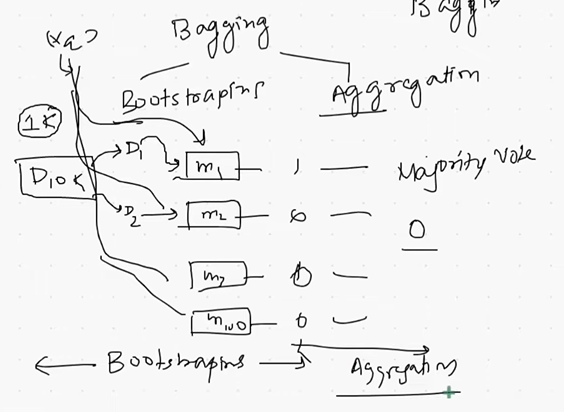

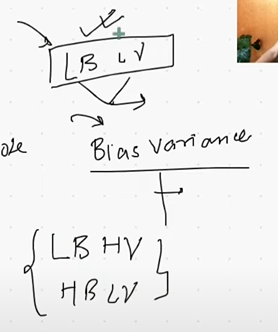

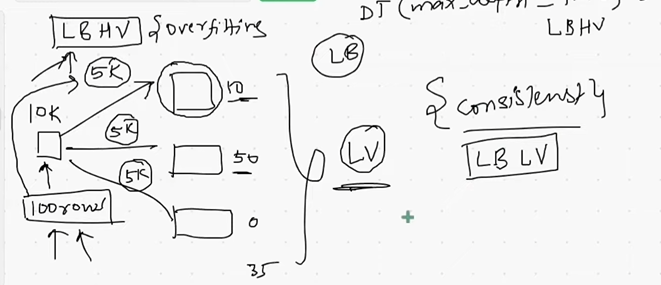

Random Forest is one of the examples of Bagging